Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN     

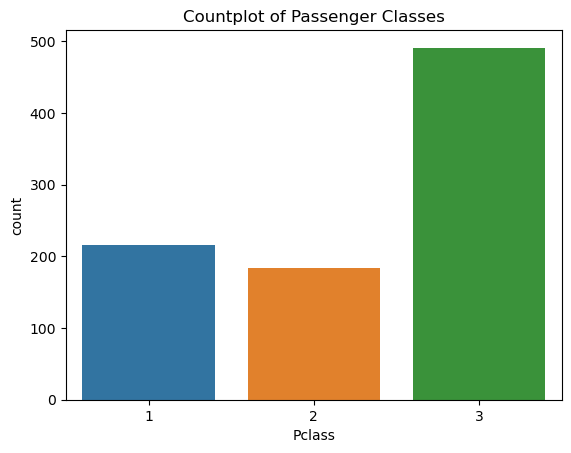


Female passengers who survived:
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Hewlett, Mrs. (Mary D Kingcome) ', 'Masselmani, Mrs. Fatima', 'McGowan, Miss. Anna "Annie"', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'O\'Dwyer, Miss. Ellen "Nellie"', 'Spencer, Mrs. William Augustus (Marie Eugenie)', 'Glynn, Miss. Mary Agatha', 'Nicola-Yarred, Miss. Jamila', 'Laroche, Miss. Simonne Marie Anne Andree', 'Devaney, Miss. Margaret Delia', "O'Driscoll, Miss. Bridget", 'Harper, Mrs. Henry Sleeper (Myna Haxtun)', 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)', 'Rugg, Miss. Emily', 'West, Miss. Constance Mirium', 'Icard, Miss. Amelie', 'Nye, Mrs. (Elizabeth Ramell)', 'Andersson, Miss. Erna Alexandra', 'Dowdell, Miss. Elizabeth', 'McDermot

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# 2. Understand the data (shape, info, describe)
print("Shape:", titanic.shape)
print("\nInfo:")
print(titanic.info())
print("\nDescribe:")
print(titanic.describe(include='all'))

# 3. Fill missing values in Age using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

# 4. Fill missing Cabin with "Unknown"
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

# 5. Fill missing Embarked with the mode
mode_embarked = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(mode_embarked)

# 6. Analyse the passenger Class feature using countplot
sns.countplot(data=titanic, x='Pclass')
plt.title('Countplot of Passenger Classes')
plt.show()

# 7. List names of passengers who are female and survived
female_survivors = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]
print("\nFemale passengers who survived:")
print(female_survivors['Name'].to_list())

# 8. Passengers in 3rd class and under age 18
third_class_under18 = titanic[(titanic['Pclass'] == 3) & (titanic['Age'] < 18)]
print("\nPassengers in 3rd class and under 18:")
print(third_class_under18[['Name', 'Age']])

# 9. Passengers in class 1 and older than 40
class1_over40 = titanic[(titanic['Pclass'] == 1) & (titanic['Age'] > 40)]
print("\nPassengers in 1st class and older than 40:")
print(class1_over40[['Name', 'Age']])

# 10. Passengers who survived in above category (class 1 & >40)
class1_over40_survived = class1_over40[class1_over40['Survived'] == 1]
print("\nPassengers in 1st class, older than 40, who survived:")
print(class1_over40_survived[['Name', 'Age']])

# 11. Male passengers who paid fare > 100
male_fare_gt100 = titanic[(titanic['Sex'] == 'male') & (titanic['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:")
print(male_fare_gt100[['Name', 'Fare']])

# 12. Passengers embarked from port 'C' and in Class 2
embarked_c_class2 = titanic[(titanic['Embarked'] == 'C') & (titanic['Pclass'] == 2)]
print("\nPassengers embarked from 'C' and in Class 2:")
print(embarked_c_class2[['Name', 'Embarked', 'Pclass']])

# 13. Passengers with more than 2 siblings/spouses aboard (SibSp > 2)
sibsp_gt2 = titanic[titanic['SibSp'] > 2]
print("\nPassengers with more than 2 siblings/spouses aboard:")
print(sibsp_gt2[['Name', 'SibSp']])

# 14. Passengers who did not survive and had no family aboard (SibSp = 0 and Parch = 0)
no_family_not_survived = titanic[(titanic['Survived'] == 0) & (titanic['SibSp'] == 0) & (titanic['Parch'] == 0)]
print("\nPassengers who did not survive and had no family aboard:")
print(no_family_not_survived[['Name', 'SibSp', 'Parch']])

# 15. Top 5 oldest passengers who survived
oldest_survivors = titanic[titanic['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:")
print(oldest_survivors[['Name', 'Age']])

# 16. Passengers who paid zero fare (Fare = 0)
fare_zero = titanic[titanic['Fare'] == 0]
print("\nPassengers who paid zero fare:")
print(fare_zero[['Name', 'Fare']])

# 17. Split the dataset for training and testing
train_df, test_df = train_test_split(titanic, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")